## Importing Libraries

In [2]:
import os
import librosa
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

## list of genre along the count to the dictionary

In [6]:
data_dir = "./genres_original"
# List of genre classes
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'metal', 'pop', 'reggae', 'rock']

# Initialize a dictionary to store the genre names and their counts
genre_counts = {'Genre': [], 'Count': []}

# Iterate over each genre in classes
for genre in classes:
    genre_path = os.path.join(data_dir, genre)
    if os.path.isdir(genre_path):  # Check if it's a directory
        # Count the number of files in the genre folder
        file_count = len([f for f in os.listdir(genre_path) if os.path.isfile(os.path.join(genre_path, f))])
        # Append the genre name and count to the dictionary
        genre_counts['Genre'].append(genre)
        genre_counts['Count'].append(file_count)

# Convert the dictionary to a DataFrame for tabular display
df = pd.DataFrame(genre_counts)

# Display the DataFrame
print(df)

       Genre  Count
0      blues    100
1  classical    100
2    country    100
3      disco    100
4     hiphop    100
5      metal    100
6        pop    100
7     reggae    100
8       rock    100


## Visualizing Single Audio

In [8]:
random_file_name = "./blues.00000.wav"

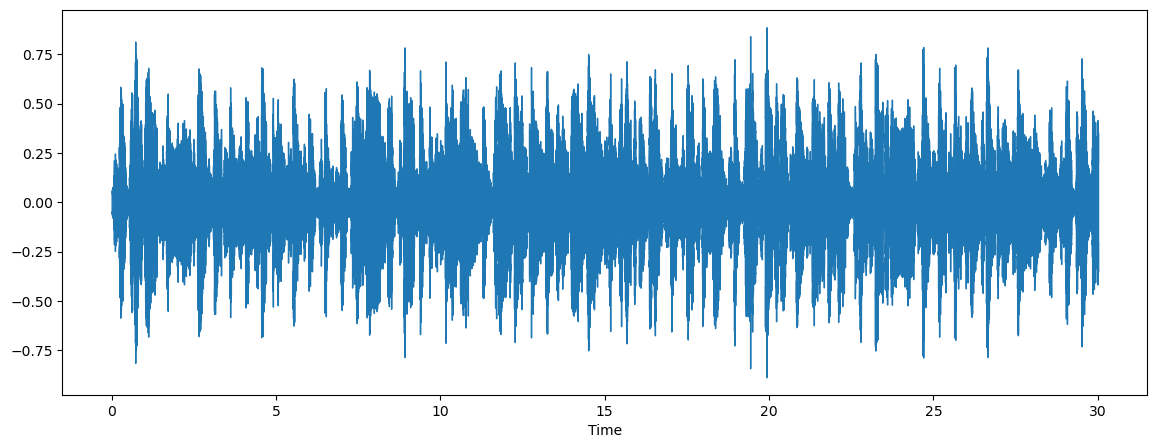

In [9]:
y, sr = librosa.load(random_file_name, sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

In [10]:
y.shape

(1323588,)

## Playing Sound

In [12]:
from IPython.display import Audio
Audio(data=y, rate=sr)


## Doing Visualization on chunks of Audio

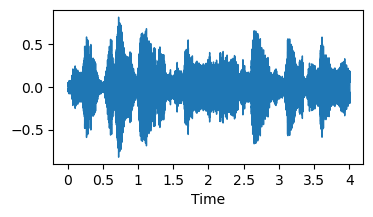

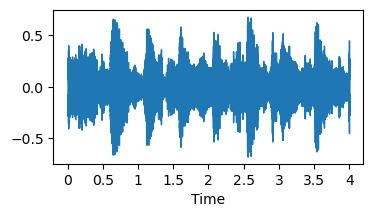

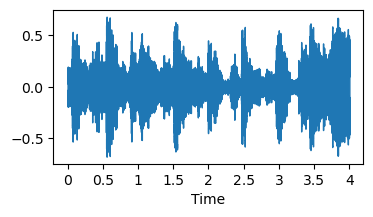

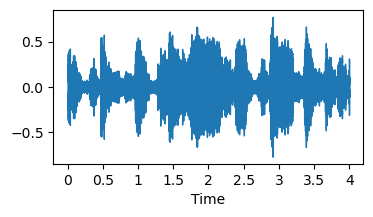

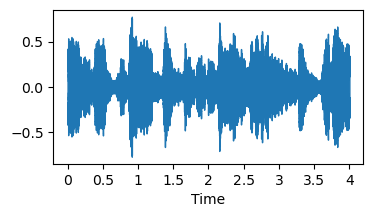

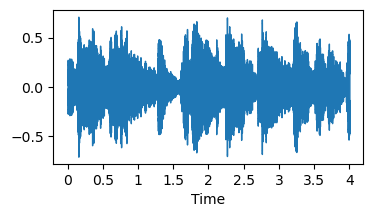

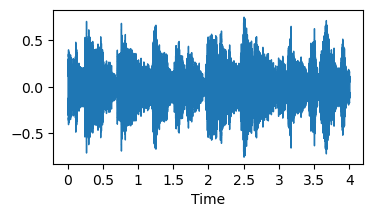

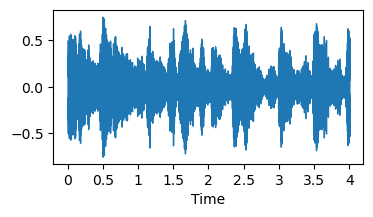

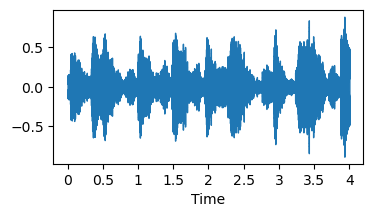

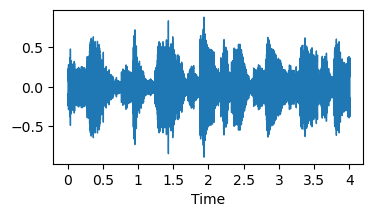

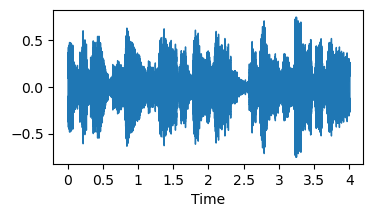

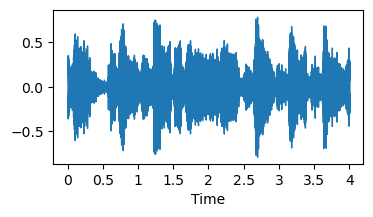

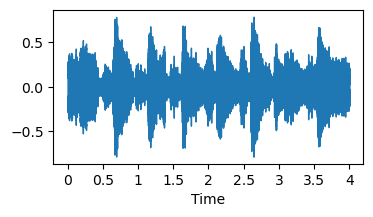

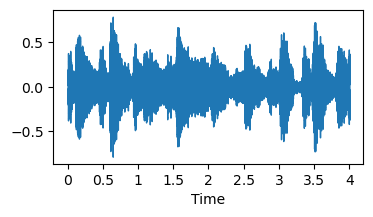

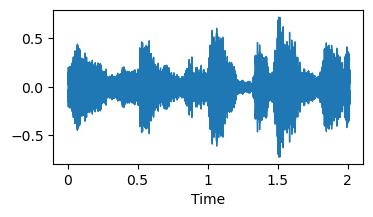

In [14]:
audio_path = "./blues.00000.wav"
y,sr = librosa.load(audio_path,sr=None) #sr=None to keep original rate

#define the duration of each chunk and overlap
chunk_duration = 4  #in second
overlap_duration = 2 #in second

#Convert duration to sample
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

#Calculate the number of chunks
num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples))) + 1

#iterate over each chunks
for i in range(num_chunks):
    #calculate start and end indices of the chunk
    start = i*(chunk_samples-overlap_samples)
    end = start + chunk_samples
    #Extract the chunk audio
    chunk = y[start:end]
    plt.figure(figsize=(4,2))
    librosa.display.waveshow(chunk,sr=sr)
    plt.show()

## Mel Spectogram

In [16]:
#plotting melspectogram for entire audio
def plot_melspectrogram(y,sr,audio_path):
    #compute spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    #convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
    #visualize the spectrogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Mel Spectrogram of {os.path.basename(audio_path)}")
    plt.tight_layout()
    plt.show()

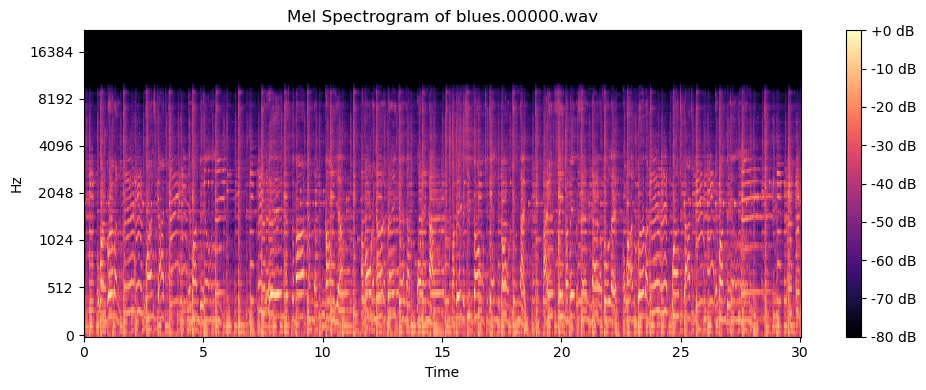

In [17]:
audio_path = "./blues.00000.wav"
y, sr = librosa.load(audio_path, sr=44100)
plot_melspectrogram(y, sr, audio_path)

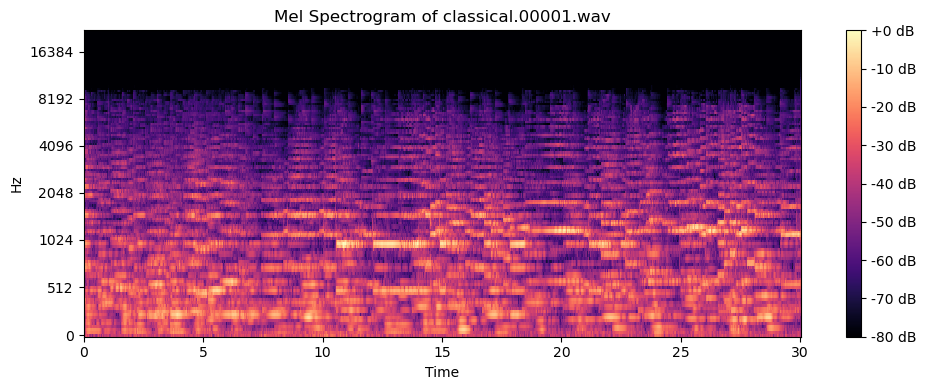

In [18]:
audio_path = "./classical.00001.wav"
y, sr = librosa.load(audio_path, sr=44100)
plot_melspectrogram(y, sr, audio_path)

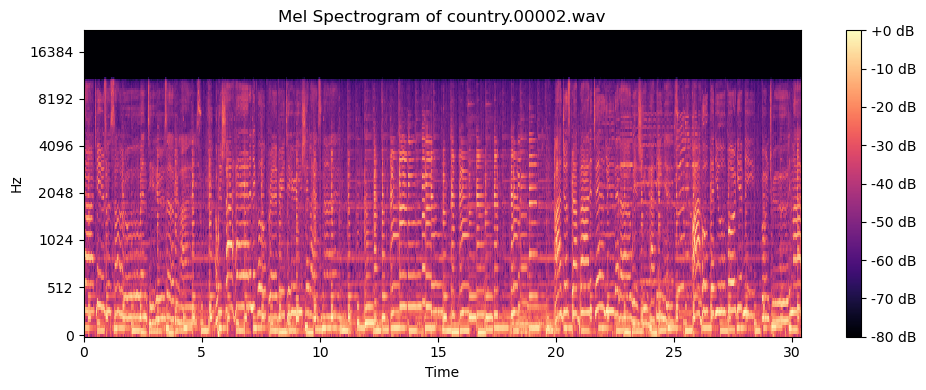

In [19]:
audio_path = "./country.00002.wav"
y, sr = librosa.load(audio_path, sr=44100)
plot_melspectrogram(y, sr, audio_path)

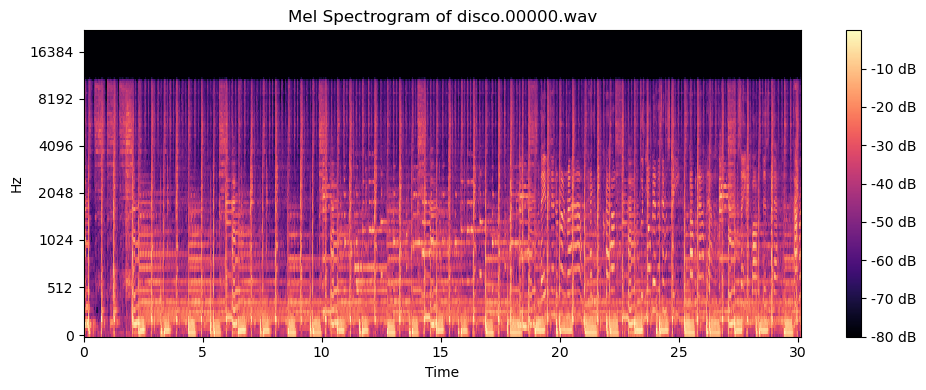

In [20]:
audio_path = "./disco.00000.wav"
y, sr = librosa.load(audio_path, sr=44100)
plot_melspectrogram(y, sr, audio_path)

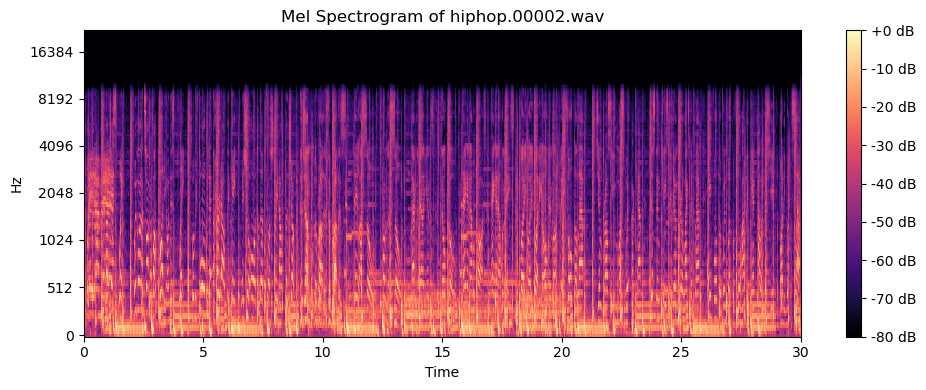

In [21]:
audio_path = "./hiphop.00002.wav"
y, sr = librosa.load(audio_path, sr=44100)
plot_melspectrogram(y, sr, audio_path)

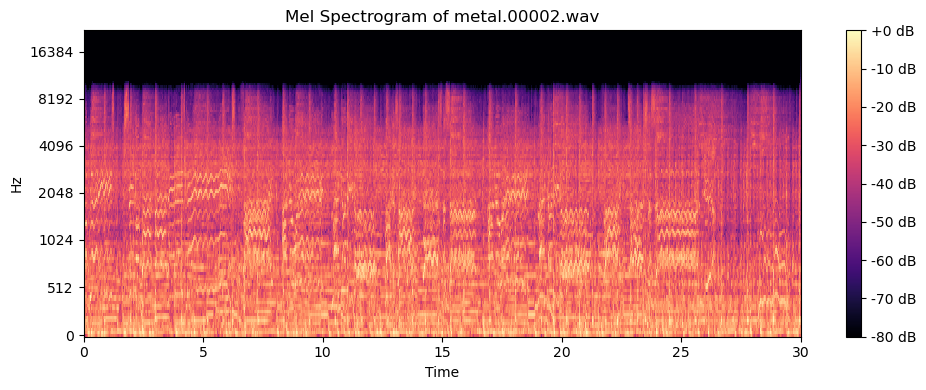

In [22]:
audio_path = "./metal.00002.wav"
y, sr = librosa.load(audio_path, sr=44100)
plot_melspectrogram(y, sr, audio_path)

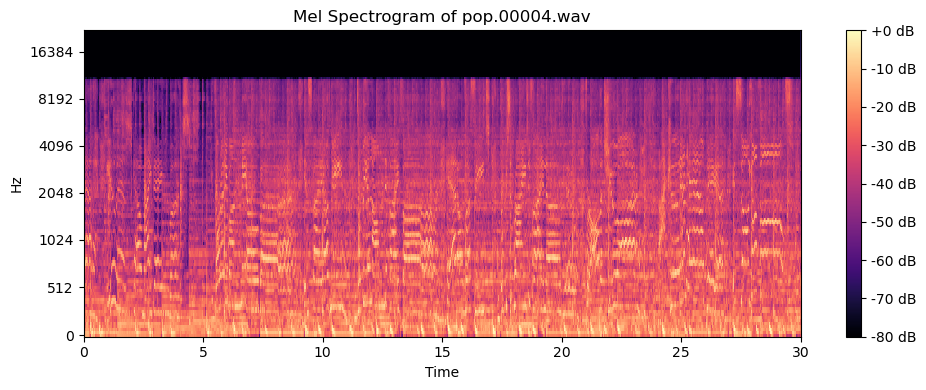

In [23]:
audio_path = "./pop.00004.wav"
y, sr = librosa.load(audio_path, sr=44100)
plot_melspectrogram(y, sr, audio_path)

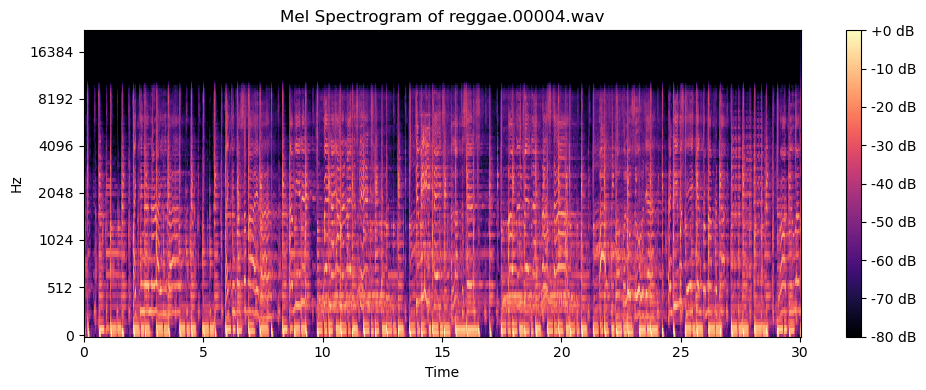

In [24]:
audio_path = "./reggae.00004.wav"
y, sr = librosa.load(audio_path, sr=44100)
plot_melspectrogram(y, sr, audio_path)

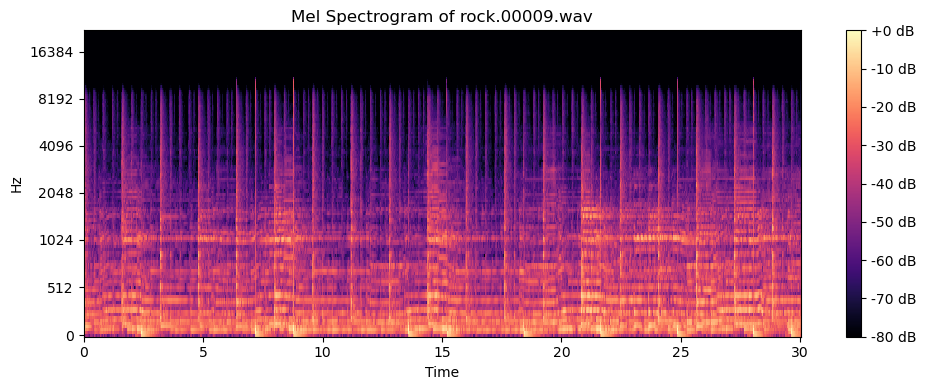

In [25]:
audio_path = "./rock.00009.wav"
y, sr = librosa.load(audio_path, sr=44100)
plot_melspectrogram(y, sr, audio_path)

## Doing Visualization on chunks of Melspectrogram

In [27]:
def plot_melspectrogram_chunks(y,sr):
    chunk_duration = 4  #in second
    overlap_duration = 2 #in second

    #Convert duration to sample
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    #Calculate the number of chunks
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples))) + 1
    
    #iterate over each chunks
    for i in range(num_chunks):
        #calculate start and end indices of the chunk
        start = i*(chunk_samples-overlap_samples)
        end = start + chunk_samples
        #Extract the chunk audio
        chunk = y[start:end]
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        #convert to decibels (log scale)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
        #visualize the spectrogram
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title("Mel Spectrogram")
        plt.tight_layout()
        plt.show()

(128, 345)


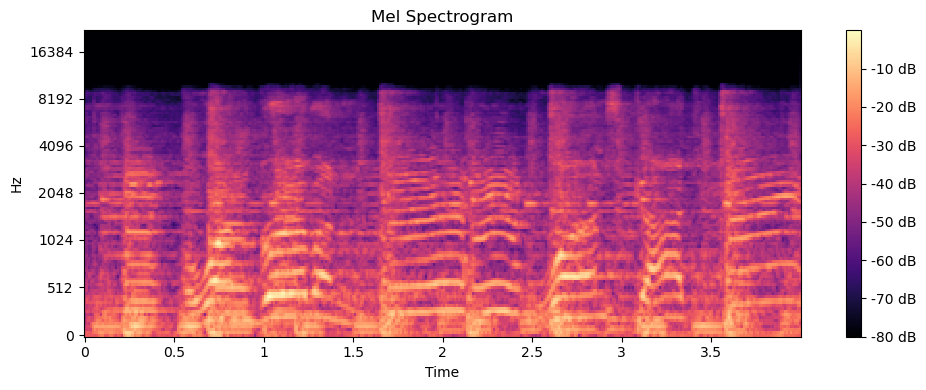

(128, 345)


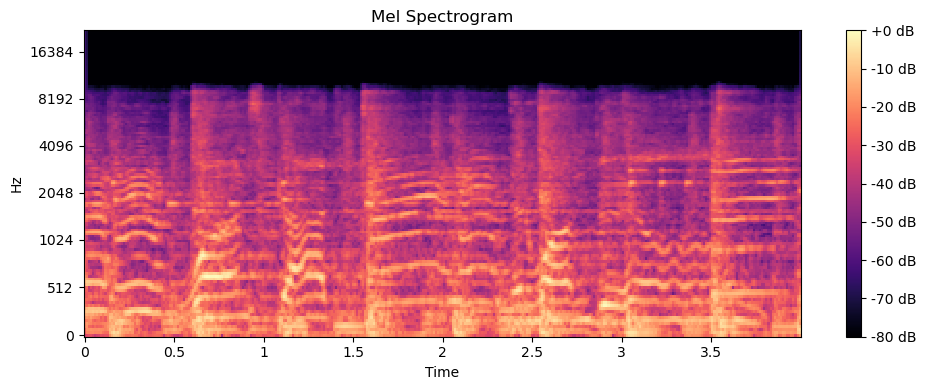

(128, 345)


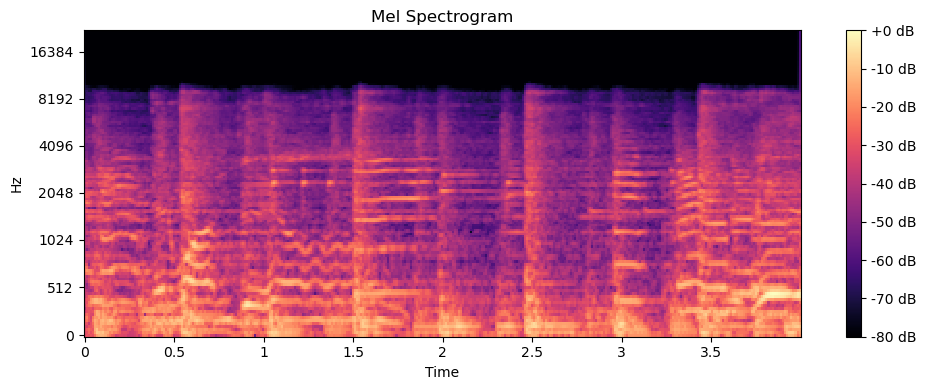

(128, 345)


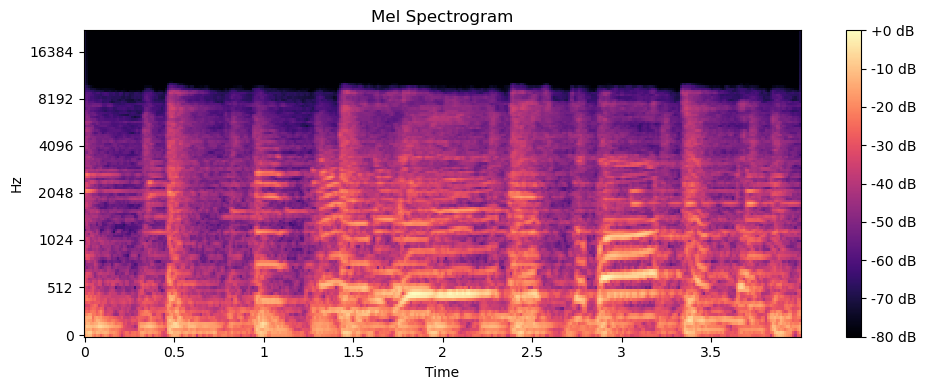

(128, 345)


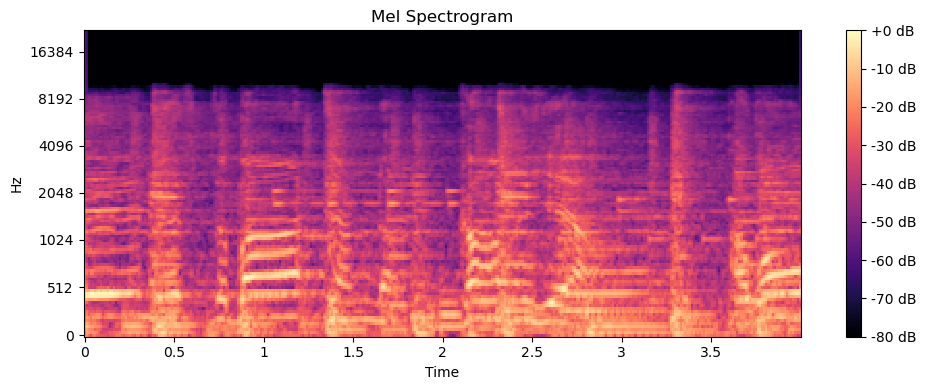

(128, 345)


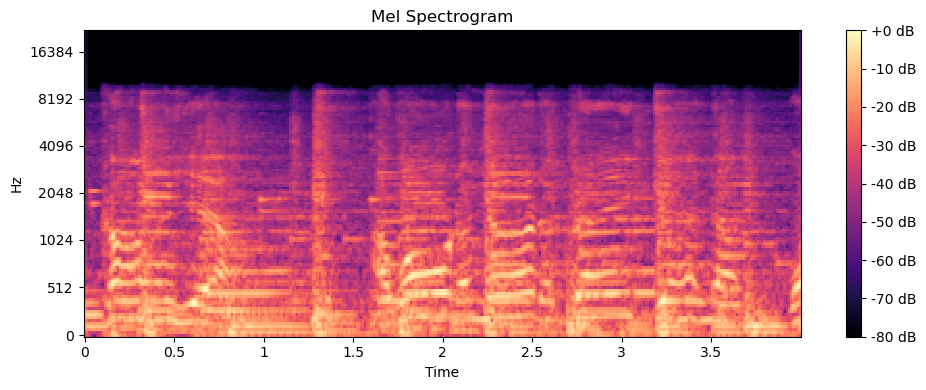

(128, 345)


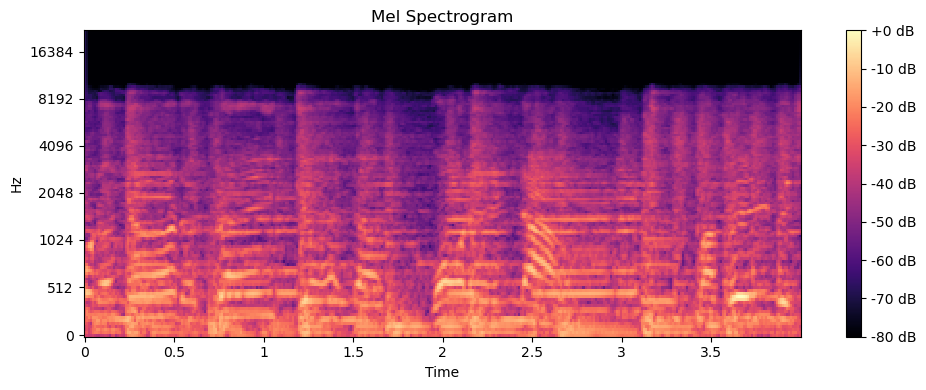

(128, 345)


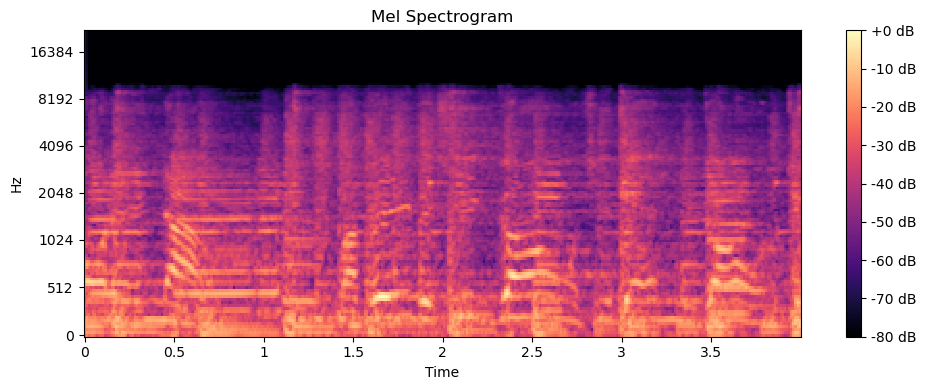

(128, 345)


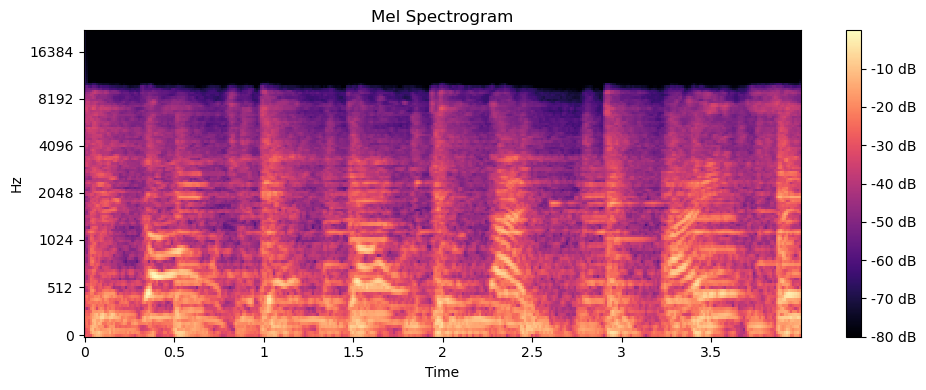

(128, 345)


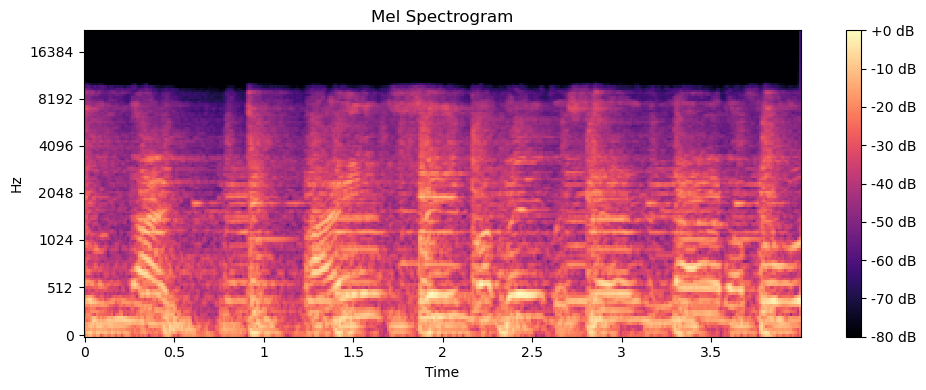

(128, 345)


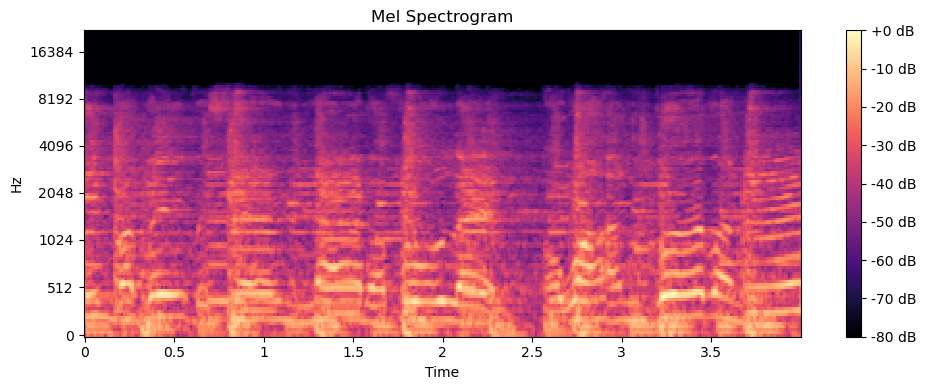

(128, 345)


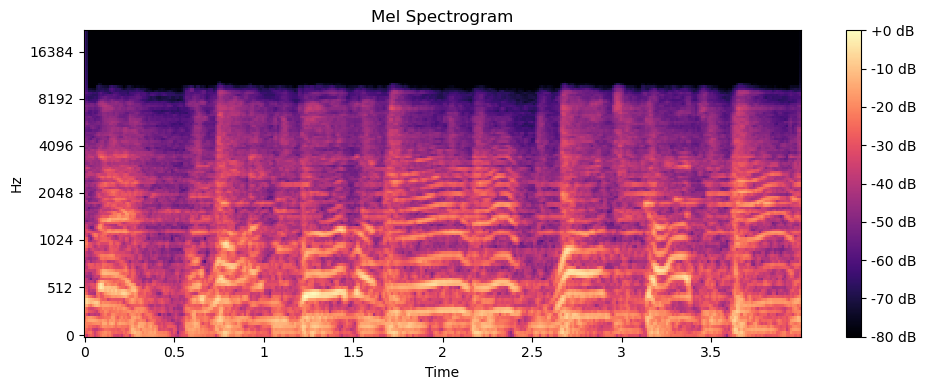

(128, 345)


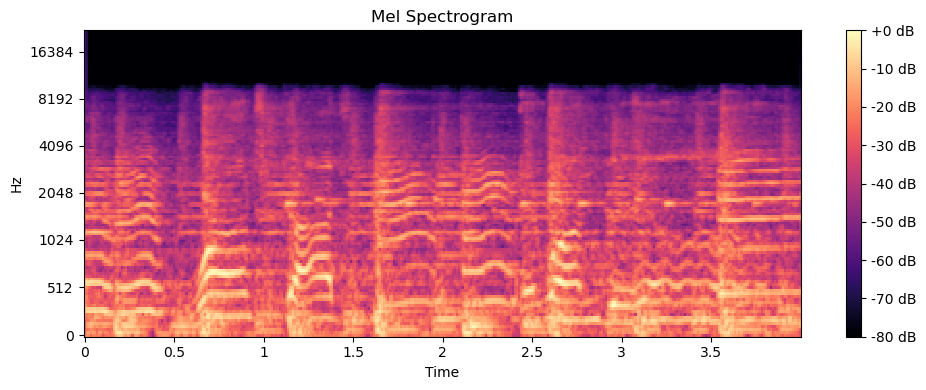

(128, 345)


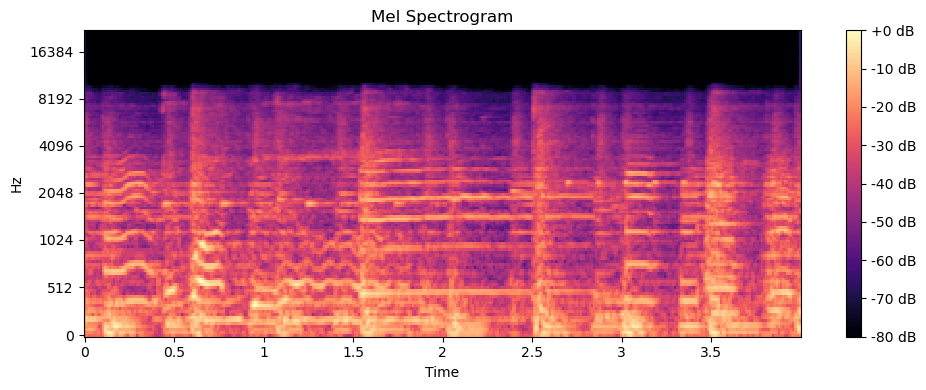

(128, 174)


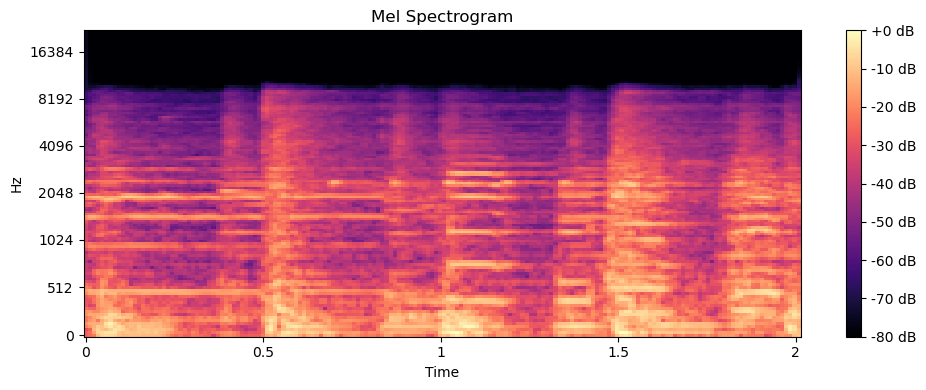

In [28]:
audio_path = "./blues.00000.wav"
y, sr = librosa.load(audio_path, sr=44100)
plot_melspectrogram_chunks(y, sr)

## Data Preprocessing Final

In [30]:
#define your folder structure
data_dir = "./genres_original"
classes = ['blues','classical','country','disco','hiphop','metal','pop','reggae','rock']

In [31]:
from tensorflow.image import resize
#Load and preprocess audio data
def load_and_preprocess_data(data_dir,classes,target_shape=(150,150)):
    data=[]
    labels=[]

    for i_class,class_name in enumerate(classes):
        class_dir = os.path.join(data_dir,class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir,filename)
                audio_data,sample_rate = librosa.load(file_path,sr=None)
                #Performing Preprocessing
                #define the duration of each chunk and overlap
                chunk_duration = 4
                overlap_duration = 2
                
                #Convert duration to sample
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                #Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1
                
                #iterate over each chunks
                for i in range(num_chunks):
                    #Calculate start and end indices of the chunk
                    start = i*(chunk_samples-overlap_samples)
                    end = start+chunk_samples
                    #Extract the chunk audio
                    chunk = audio_data[start:end]
                    #Melspectrogram part
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                    #Resize matrix based on provided target shape
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram,axis=-1),target_shape)
                    #Append data to list
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    #Return
    return np.array(data),np.array(labels)

In [32]:
data,labels = load_and_preprocess_data(data_dir,classes)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [33]:
data.shape

(13490, 150, 150, 1)

In [34]:
labels.shape

(13490,)

In [35]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,num_classes = len(classes)) #Converting labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [36]:
labels.shape

(13490, 9)

## Splitting of Dataset into Training and Test set


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

## Building Model


In [40]:
model = tf.keras.models.Sequential()

In [41]:
X_train[0].shape


(150, 150, 1)

In [42]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


C:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [44]:

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [45]:
model.add(Dropout(0.3))


In [46]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [47]:

model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [48]:
model.add(Dropout(0.3))


In [49]:
model.add(Flatten())


In [50]:
model.add(Dense(units=1200,activation='relu'))


In [51]:
model.add(Dropout(0.45))


In [52]:

#Output layer
model.add(Dense(units=len(classes),activation='softmax'))

In [53]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 74, 74, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 36, 36, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 17, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1200)           │     2,458,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │        10,809 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,181,257 (27.39 MB)

 Trainable params: 7,181,257 (27.39 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [55]:
#Training Model
training_history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 269s 780ms/step - accuracy: 0.2169 - loss: 2.0557 - val_accuracy: 0.4577 - val_loss: 1.5344
Epoch 2/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 284s 842ms/step - accuracy: 0.4916 - loss: 1.4440 - val_accuracy: 0.6049 - val_loss: 1.1175
Epoch 3/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 269s 797ms/step - accuracy: 0.6057 - loss: 1.1226 - val_accuracy: 0.6171 - val_loss: 1.0947
Epoch 4/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 262s 776ms/step - accuracy: 0.6764 - loss: 0.9257 - val_accuracy: 0.7135 - val_loss: 0.8328
Epoch 5/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 275s 814ms/step - accuracy: 0.7214 - loss: 0.8055 - val_accuracy: 0.7498 - val_loss: 0.7284
Epoch 6/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 285s 842ms/step - accuracy: 0.7759 - loss: 0.6557 - val_accuracy: 0.7591 - val_loss: 0.6725
Epoch 7/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 282s 834ms/step - accuracy: 0.8069 - loss: 0.5562 - val_accuracy: 0.7654 - val_loss: 0.6627
Epoch 8/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 269s 796ms/step - accuracy: 0.8392 -

In [56]:
model.save("Trained_model.keras") #Windows

In [57]:
training_history.history


{'accuracy': [0.29364344477653503,
  0.522424042224884,
  0.6230540871620178,
  0.689862847328186,
  0.7326723337173462,
  0.7797442674636841,
  0.8112490773200989,
  0.8413639664649963,
  0.8690696954727173,
  0.8857486844062805,
  0.8998332023620605,
  0.9179947972297668,
  0.9244810938835144,
  0.9307820796966553,
  0.9511675238609314,
  0.94820237159729,
  0.9573758244514465,
  0.960711658000946,
  0.9653447270393372,
  0.9704410433769226,
  0.9711823463439941,
  0.970719039440155,
  0.9734988808631897,
  0.9747961163520813,
  0.9814677834510803,
  0.975908100605011,
  0.9856374859809875,
  0.9838769435882568,
  0.9761860370635986,
  0.9884173274040222],
 'loss': [1.9007800817489624,
  1.3521403074264526,
  1.0724666118621826,
  0.8949666619300842,
  0.7791536450386047,
  0.6489722728729248,
  0.5540408492088318,
  0.4666290283203125,
  0.39167097210884094,
  0.3382568955421448,
  0.2877819240093231,
  0.24261291325092316,
  0.21815745532512665,
  0.2069333791732788,
  0.1481229364

In [58]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)


In [59]:
X_train


array([[[[2.16458030e-02],
         [2.84843985e-02],
         [2.62774471e-02],
         ...,
         [2.74668317e-02],
         [3.07752490e-02],
         [5.14375381e-02]],

        [[1.67185385e-02],
         [1.06357429e-02],
         [8.69153813e-03],
         ...,
         [1.13777034e-02],
         [1.41660441e-02],
         [2.79521532e-02]],

        [[4.21777740e-02],
         [4.53175083e-02],
         [3.84430699e-02],
         ...,
         [2.65855435e-02],
         [4.31285277e-02],
         [3.49732302e-02]],

        ...,

        [[7.70925726e-06],
         [2.74178933e-06],
         [1.18034097e-06],
         ...,
         [1.22775953e-06],
         [1.66842688e-06],
         [4.83745271e-06]],

        [[8.15748172e-06],
         [2.62513367e-06],
         [1.26639100e-06],
         ...,
         [1.05716424e-06],
         [1.49623361e-06],
         [4.94950382e-06]],

        [[7.25242444e-06],
         [2.58070941e-06],
         [1.37585539e-06],
         ...,
 

In [60]:
#Reloading model variable
model = tf.keras.models.load_model("Trained_model.keras")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 74, 74, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 36, 36, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 17, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1200)           │     2,458,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │        10,809 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,543,773 (82.18 MB)

 Trainable params: 7,181,257 (27.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,362,516 (54.79 MB)

In [61]:

#Reloading Training history
import json
with open("training_hist.json",'r') as json_file:
    training_history_data = json.load(json_file)

In [62]:
training_history_data.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Model Evaluation - I


In [64]:
#Model evaluation on Training set
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

338/338 ━━━━━━━━━━━━━━━━━━━━ 75s 220ms/step - accuracy: 0.9993 - loss: 0.0057


In [65]:
train_accuracy

0.9987027645111084

In [66]:
train_loss

0.005928921513259411

In [67]:
#Model evaluation on Validation set
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 207ms/step - accuracy: 0.9268 - loss: 0.2533


In [68]:
val_loss,val_accuracy


(0.25147944688796997, 0.929948091506958)

In [69]:
training_history_data['val_loss']

[1.5343689918518066,
 1.1174792051315308,
 1.094696283340454,
 0.8327678442001343,
 0.7284478545188904,
 0.6725361943244934,
 0.6627407670021057,
 0.5239238142967224,
 0.478527307510376,
 0.4045136570930481,
 0.41047435998916626,
 0.3934842348098755,
 0.37653449177742004,
 0.33111998438835144,
 0.5242447257041931,
 0.3619014024734497,
 0.3842906057834625,
 0.3440098762512207,
 0.29690873622894287,
 0.3844062089920044,
 0.30975836515426636,
 0.3706872761249542,
 0.30493587255477905,
 0.3440230190753937,
 0.3845016658306122,
 0.29945358633995056,
 0.34629201889038086,
 0.34887152910232544,
 0.35889407992362976,
 0.25147944688796997]

## Accuracy and Loss Visualization


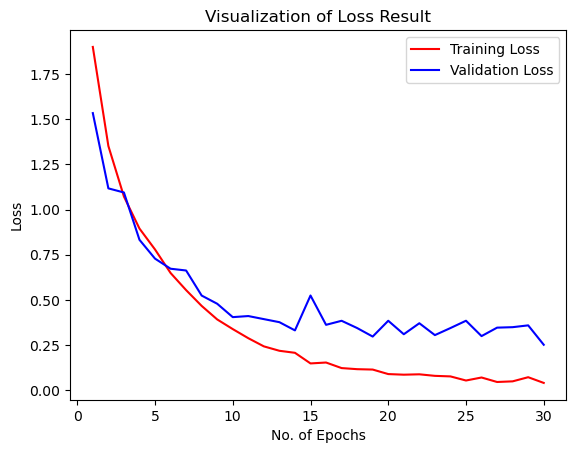

In [71]:
#Visualization of Loss
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

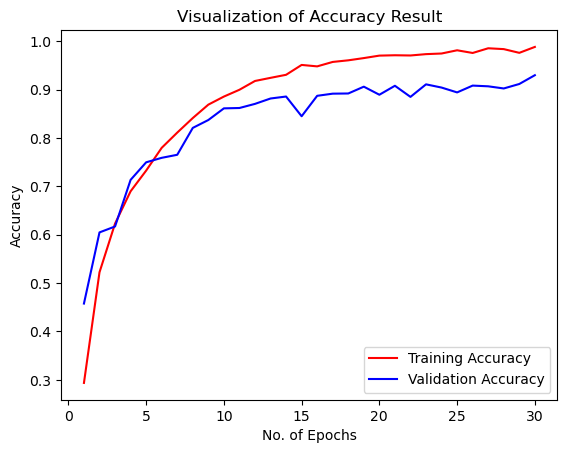

In [72]:
#Visualization of Accuracy
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Precision,Recall,Confusion Matrix - Model Evaluation-II


In [74]:
X_test.shape


(2698, 150, 150, 1)

In [75]:
y_pred = model.predict(X_test)
y_pred

85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 213ms/step


array([[3.7671384e-07, 4.2421608e-09, 9.9999380e-01, ..., 2.0069150e-07,
        1.5971488e-06, 3.9961733e-06],
       [1.3389491e-01, 6.3106604e-09, 4.5173329e-06, ..., 3.2831009e-09,
        8.5846680e-01, 2.1361900e-03],
       [1.0879634e-04, 1.0116631e-08, 9.9988842e-01, ..., 2.0783952e-09,
        1.7180074e-06, 9.6686142e-07],
       ...,
       [1.9143450e-13, 2.5189426e-13, 2.7098015e-13, ..., 9.9976212e-01,
        1.5517433e-08, 2.5301115e-11],
       [7.1154682e-07, 2.2076077e-07, 9.9999797e-01, ..., 6.0914658e-07,
        4.2534489e-07, 6.4598488e-08],
       [1.8447377e-08, 5.9548516e-12, 1.0377605e-09, ..., 4.3543262e-09,
        3.2952545e-09, 4.7574467e-05]], dtype=float32)

In [76]:
y_pred.shape


(2698, 9)

In [77]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([2, 7, 2, ..., 6, 2, 5], dtype=int64)

In [78]:
Y_test


array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
Y_test.shape


(2698, 9)

In [80]:
true_categories = np.argmax(Y_test,axis=1)
true_categories

array([2, 0, 2, ..., 6, 2, 5], dtype=int64)

In [81]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'metal',
 'pop',
 'reggae',
 'rock']

In [82]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.96      0.93      0.95       316
   classical       0.97      0.98      0.98       291
     country       0.91      0.94      0.92       326
       disco       0.93      0.94      0.93       289
      hiphop       0.94      0.92      0.93       295
       metal       0.90      0.95      0.92       298
         pop       0.96      0.94      0.95       318
      reggae       0.95      0.93      0.94       273
        rock       0.86      0.84      0.85       292

    accuracy                           0.93      2698
   macro avg       0.93      0.93      0.93      2698
weighted avg       0.93      0.93      0.93      2698



In [83]:
cm

array([[293,   1,  11,   0,   2,   1,   0,   5,   3],
       [  1, 286,   1,   0,   0,   0,   1,   1,   1],
       [  3,   1, 305,   4,   0,   0,   0,   1,  12],
       [  1,   1,   2, 272,   0,   2,   2,   0,   9],
       [  1,   2,   0,   4, 272,   8,   3,   2,   3],
       [  1,   0,   5,   0,   1, 283,   0,   0,   8],
       [  2,   1,   2,   4,   4,   2, 299,   1,   3],
       [  0,   0,   4,   3,   7,   0,   2, 255,   2],
       [  2,   3,   7,   7,   2,  19,   5,   3, 244]], dtype=int64)

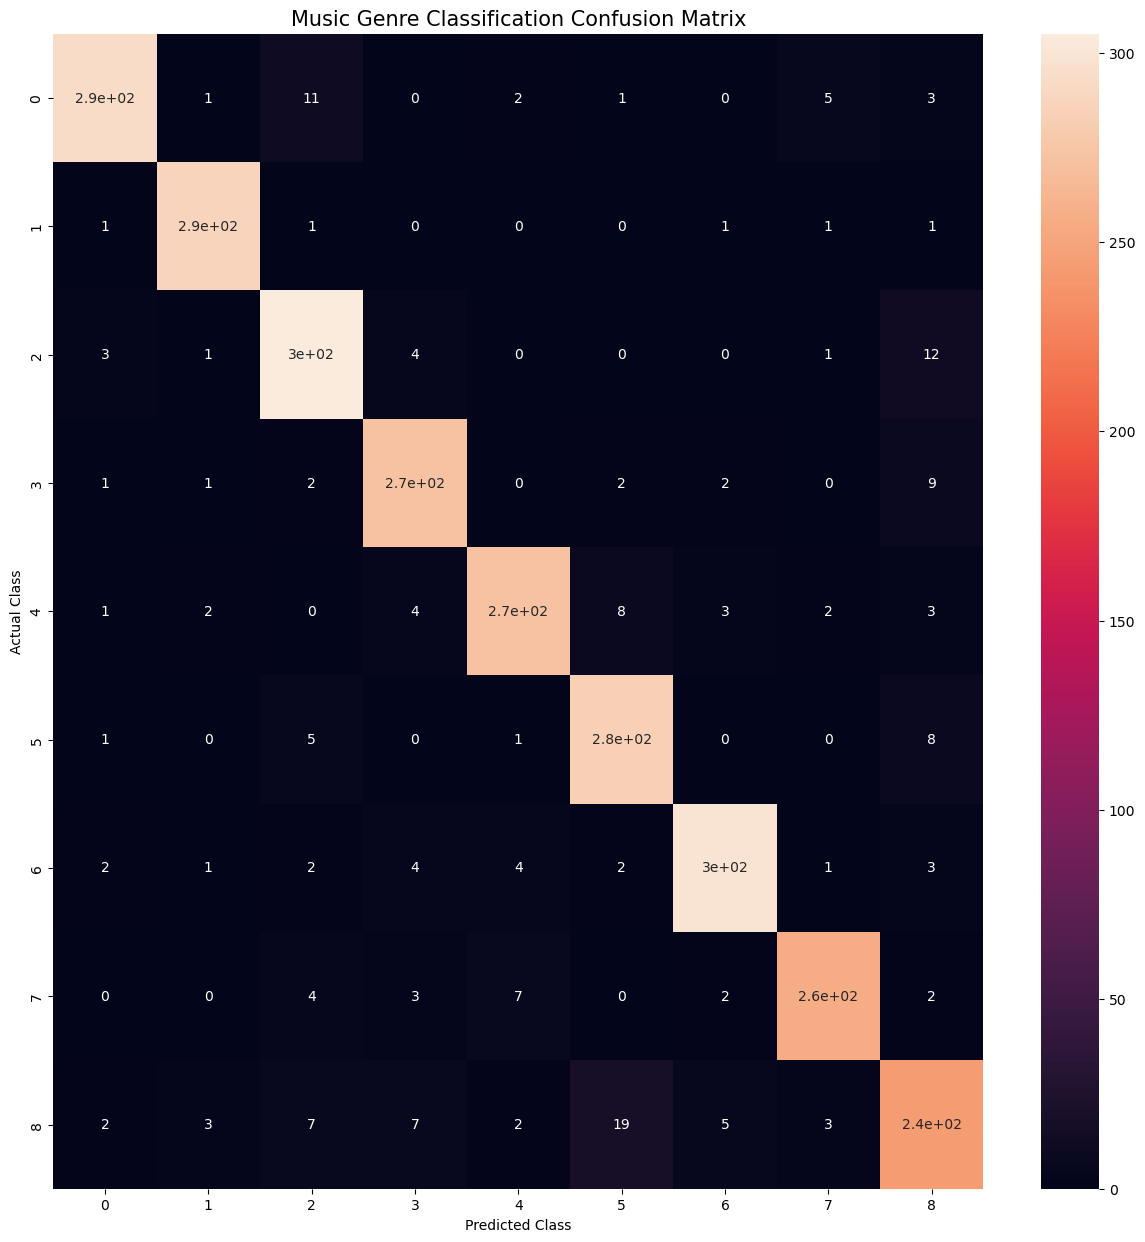

In [84]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Music Genre Classification Confusion Matrix",fontsize=15)
plt.show()